In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [106]:
unemployment_MH_file = os.path.join("Resource","project_f_data.csv" )
#encoding = "utf-8"
#read in our csv file
unemployment_MH_df = pd.read_csv(unemployment_MH_file, encoding="latin")
#display our dataframe from our csv file
unemployment_MH_df.tail()


,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
329,0,0,High School or GED,1,0,NaN,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
330,1,0,Some Undergraduate,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
331,1,0,Some Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
332,0,1,Some Undergraduate,0,1,1.0,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet
333,1,1,Some Undergraduate,1,0,0.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,18-29,Female,"$10,000-$24,999",Pacific,Android Phone / Tablet


In [3]:
#show our columns to reconstruct our data frame
unemployment_MH_df.columns

Index(['I am currently employed at least part-time',
       'I identify as having a mental illness', 'Education',
       'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume inÿmonths.',
       'Annual income including any social welfare programs in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender',

In [4]:
# Filter the DataFrame down only to those columns to chart
redone_unemployment_MH_df = unemployment_MH_df[["Education",
                                                "Lack of concentration",
                                                "Anxiety",
                                                "Depression",
                                                "Obsessive thinking",
                                                "Panic attacks",
                                                "Mood swings",
                                                "Compulsive behavior",
                                                "Tiredness"]]
redone_unemployment_MH_df

,Education,Lack of concentration,Anxiety,Depression,Obsessive thinking,Panic attacks,Mood swings,Compulsive behavior,Tiredness
0,High School or GED,1.0,1,1,1.0,1.0,0.0,0.0,0.0
1,Some Phd,1.0,1,1,0.0,1.0,0.0,0.0,1.0
2,Completed Undergraduate,0.0,0,0,0.0,0.0,0.0,0.0,0.0
3,Some Undergraduate,0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,Completed Undergraduate,1.0,1,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
329,High School or GED,0.0,0,0,0.0,0.0,0.0,0.0,1.0
330,Some Undergraduate,0.0,0,0,0.0,0.0,0.0,0.0,0.0
331,Some Undergraduate,0.0,0,0,0.0,0.0,0.0,0.0,0.0
332,Some Undergraduate,1.0,1,1,1.0,1.0,1.0,1.0,1.0


In [5]:
#Get a value count of our education
redone_unemployment_MH_df["Education"].value_counts()

Completed Undergraduate    100
Some Undergraduate          82
High School or GED          63
Completed Masters           49
SomeÿMasters                12
Some highschool             10
Completed Phd               10
Some Phd                     8
Name: Education, dtype: int64

In [6]:
#observe our education data in the survey of completed education
observed_education = pd.Series([63, 100, 49, 10 ], index=["High School or GED", "Completed Undergraduate", "Completed Masters", "Completed Phd"])
#create a dataframe of our education data observed
observed_education_df = pd.DataFrame([observed_education]).T
observed_education_df

,0
High School or GED,63
Completed Undergraduate,100
Completed Masters,49
Completed Phd,10


In [7]:
education_vs_anxiety1_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Education"])["Anxiety"].mean())
education_vs_anxiety1_groupby

,Anxiety
Education,
Completed Masters,0.142857
Completed Phd,0.200000
Completed Undergraduate,0.220000
High School or GED,0.396825
Some Phd,0.125000
Some Undergraduate,0.414634
Some highschool,0.500000
SomeÿMasters,0.333333


In [8]:
#groupby anxiety and completed education to find the % of completion with the illness
education_vs_anxiety_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Education"])["Anxiety"].mean())
education_vs_anxiety_groupby

,Anxiety
Education,
Completed Masters,0.142857
Completed Phd,0.200000
Completed Undergraduate,0.220000
High School or GED,0.396825
Some Phd,0.125000
Some Undergraduate,0.414634
Some highschool,0.500000
SomeÿMasters,0.333333


In [9]:
#groupby obessive thinking and completed education to find the % of completion with the illness
education_vs_obs_thinking_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Education"])["Obsessive thinking"].mean())
education_vs_obs_thinking_groupby

,Obsessive thinking
Education,
Completed Masters,0.040816
Completed Phd,0.000000
Completed Undergraduate,0.080000
High School or GED,0.126984
Some Phd,0.000000
Some Undergraduate,0.259259
Some highschool,0.100000
SomeÿMasters,0.166667


In [10]:
#groupby Depression and completed education to find the % of completion with the illness
education_vs_depression_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Education"])["Depression"].mean())
education_vs_depression_groupby

,Depression
Education,
Completed Masters,0.163265
Completed Phd,0.300000
Completed Undergraduate,0.230000
High School or GED,0.269841
Some Phd,0.125000
Some Undergraduate,0.378049
Some highschool,0.100000
SomeÿMasters,0.166667


In [11]:
#groupby Lack of concentration and completed education to find the % of completion with the illness
education_vs_lack_of_concentration_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Education"])["Lack of concentration"].mean())
education_vs_lack_of_concentration_groupby

,Lack of concentration
Education,
Completed Masters,0.061224
Completed Phd,0.300000
Completed Undergraduate,0.160000
High School or GED,0.142857
Some Phd,0.250000
Some Undergraduate,0.222222
Some highschool,0.000000
SomeÿMasters,0.000000


In [12]:
#groupby Mood swings and completed education to find the % of completion with the illness
education_vs_moodswings_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Education"])["Mood swings"].mean())
education_vs_moodswings_groupby

,Mood swings
Education,
Completed Masters,0.020408
Completed Phd,0.000000
Completed Undergraduate,0.090000
High School or GED,0.174603
Some Phd,0.000000
Some Undergraduate,0.160494
Some highschool,0.300000
SomeÿMasters,0.083333


In [13]:
#groupby Tiredness and completed education to find the % of completion with the illness
education_vs_tiredness_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Education"])["Tiredness"].mean())
education_vs_tiredness_groupby

,Tiredness
Education,
Completed Masters,0.204082
Completed Phd,0.400000
Completed Undergraduate,0.290000
High School or GED,0.253968
Some Phd,0.375000
Some Undergraduate,0.358025
Some highschool,0.400000
SomeÿMasters,0.416667


In [14]:
#merging our count of completion with our anxiety % with completion
merged_count_anxiety_df = pd.concat([observed_education_df, education_vs_anxiety_groupby], axis=1)
merged_count_anxiety_df

,0,Anxiety
High School or GED,63.0,0.396825
Completed Undergraduate,100.0,0.220000
Completed Masters,49.0,0.142857
Completed Phd,10.0,0.200000
Some Phd,NaN,0.125000
Some Undergraduate,NaN,0.414634
Some highschool,NaN,0.500000
SomeÿMasters,NaN,0.333333


In [15]:
#merging our dataframe above with our obsessive thinking % with completion
merged_df_2 = pd.concat([merged_count_anxiety_df, education_vs_obs_thinking_groupby], axis=1)
merged_df_2

,0,Anxiety,Obsessive thinking
High School or GED,63.0,0.396825,0.126984
Completed Undergraduate,100.0,0.220000,0.080000
Completed Masters,49.0,0.142857,0.040816
Completed Phd,10.0,0.200000,0.000000
Some Phd,NaN,0.125000,0.000000
Some Undergraduate,NaN,0.414634,0.259259
Some highschool,NaN,0.500000,0.100000
SomeÿMasters,NaN,0.333333,0.166667


In [16]:
#merging our dataframe above with our Depression % with completion
merged_df_3 = pd.concat([merged_df_2, education_vs_depression_groupby], axis=1)
merged_df_3

,0,Anxiety,Obsessive thinking,Depression
High School or GED,63.0,0.396825,0.126984,0.269841
Completed Undergraduate,100.0,0.220000,0.080000,0.230000
Completed Masters,49.0,0.142857,0.040816,0.163265
Completed Phd,10.0,0.200000,0.000000,0.300000
Some Phd,NaN,0.125000,0.000000,0.125000
Some Undergraduate,NaN,0.414634,0.259259,0.378049
Some highschool,NaN,0.500000,0.100000,0.100000
SomeÿMasters,NaN,0.333333,0.166667,0.166667


In [17]:
#merging our dataframe above with our Lack of concentration % with completion
merged_df_4 = pd.concat([merged_df_3, education_vs_lack_of_concentration_groupby], axis=1)
merged_df_4

,0,Anxiety,Obsessive thinking,Depression,Lack of concentration
High School or GED,63.0,0.396825,0.126984,0.269841,0.142857
Completed Undergraduate,100.0,0.220000,0.080000,0.230000,0.160000
Completed Masters,49.0,0.142857,0.040816,0.163265,0.061224
Completed Phd,10.0,0.200000,0.000000,0.300000,0.300000
Some Phd,NaN,0.125000,0.000000,0.125000,0.250000
Some Undergraduate,NaN,0.414634,0.259259,0.378049,0.222222
Some highschool,NaN,0.500000,0.100000,0.100000,0.000000
SomeÿMasters,NaN,0.333333,0.166667,0.166667,0.000000


In [18]:
#merging our dataframe above with our Mood swings % with completion
merged_df_5 = pd.concat([merged_df_4, education_vs_moodswings_groupby], axis=1)
merged_df_5

,0,Anxiety,Obsessive thinking,Depression,Lack of concentration,Mood swings
High School or GED,63.0,0.396825,0.126984,0.269841,0.142857,0.174603
Completed Undergraduate,100.0,0.220000,0.080000,0.230000,0.160000,0.090000
Completed Masters,49.0,0.142857,0.040816,0.163265,0.061224,0.020408
Completed Phd,10.0,0.200000,0.000000,0.300000,0.300000,0.000000
Some Phd,NaN,0.125000,0.000000,0.125000,0.250000,0.000000
Some Undergraduate,NaN,0.414634,0.259259,0.378049,0.222222,0.160494
Some highschool,NaN,0.500000,0.100000,0.100000,0.000000,0.300000
SomeÿMasters,NaN,0.333333,0.166667,0.166667,0.000000,0.083333


In [19]:
#merging our dataframe above with our tiredness % with completion
final_MH_completion_df = pd.concat([merged_df_5, education_vs_tiredness_groupby], axis=1)
final_MH_completion_df

,0,Anxiety,Obsessive thinking,Depression,Lack of concentration,Mood swings,Tiredness
High School or GED,63.0,0.396825,0.126984,0.269841,0.142857,0.174603,0.253968
Completed Undergraduate,100.0,0.220000,0.080000,0.230000,0.160000,0.090000,0.290000
Completed Masters,49.0,0.142857,0.040816,0.163265,0.061224,0.020408,0.204082
Completed Phd,10.0,0.200000,0.000000,0.300000,0.300000,0.000000,0.400000
Some Phd,NaN,0.125000,0.000000,0.125000,0.250000,0.000000,0.375000
Some Undergraduate,NaN,0.414634,0.259259,0.378049,0.222222,0.160494,0.358025
Some highschool,NaN,0.500000,0.100000,0.100000,0.000000,0.300000,0.400000
SomeÿMasters,NaN,0.333333,0.166667,0.166667,0.000000,0.083333,0.416667


In [20]:
redone_unemployment_MH_df = unemployment_MH_df[["Household Income",
                                                "Lack of concentration",
                                                "Anxiety",
                                                "Depression",
                                                "Obsessive thinking",
                                                "Panic attacks",
                                                "Mood swings",
                                                "Compulsive behavior",
                                                "Tiredness"]]
redone_unemployment_MH_df

,Household Income,Lack of concentration,Anxiety,Depression,Obsessive thinking,Panic attacks,Mood swings,Compulsive behavior,Tiredness
0,"$25,000-$49,999",1.0,1,1,1.0,1.0,0.0,0.0,0.0
1,"$50,000-$74,999",1.0,1,1,0.0,1.0,0.0,0.0,1.0
2,"$150,000-$174,999",0.0,0,0,0.0,0.0,0.0,0.0,0.0
3,"$25,000-$49,999",0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,"$25,000-$49,999",1.0,1,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
329,Prefer not to answer,0.0,0,0,0.0,0.0,0.0,0.0,1.0
330,"$50,000-$74,999",0.0,0,0,0.0,0.0,0.0,0.0,0.0
331,"$10,000-$24,999",0.0,0,0,0.0,0.0,0.0,0.0,0.0
332,"$0-$9,999",1.0,1,1,1.0,1.0,1.0,1.0,1.0


In [21]:

redone_unemployment_MH_df["Household Income"].value_counts()

$25,000-$49,999         68
$50,000-$74,999         57
Prefer not to answer    38
$10,000-$24,999         35
$75,000-$99,999         33
$0-$9,999               27
$100,000-$124,999       24
$200,000+               20
$125,000-$149,999       16
$150,000-$174,999       14
$175,000-$199,999        2
Name: Household Income, dtype: int64

In [71]:
redone_unemployment_MH_df.loc[redone_unemployment_MH_df["Household Income"] =="$0-$9,999",["Household Income"]] = "$0-$24,999"
redone_unemployment_MH_df.loc[redone_unemployment_MH_df["Household Income"] =="$10,000-$24,999",["Household Income"]] = "$0-$24,999"
redone_unemployment_MH_df.loc[redone_unemployment_MH_df["Household Income"] =="$100,000-$124,999",["Household Income"]] = "$100-$199,999"
redone_unemployment_MH_df.loc[redone_unemployment_MH_df["Household Income"] =="$125,000-$149,999",["Household Income"]] = "$100-$199,999"
redone_unemployment_MH_df.loc[redone_unemployment_MH_df["Household Income"] =="$150,000-$174,999",["Household Income"]] = "$100-$199,999"
redone_unemployment_MH_df.loc[redone_unemployment_MH_df["Household Income"] =="$175,000-$199,999",["Household Income"]] = "$100-$199,999"

In [72]:
redone_unemployment_MH_df["Household Income"].value_counts()

$25,000-$49,999         68
$0-$24,999              62
$50,000-$74,999         57
$100-$199,999           56
Prefer not to answer    38
$75,000-$99,999         33
$200,000+               20
Name: Household Income, dtype: int64

In [74]:
observed_hh_income_df.columns = ["Total"]
observed_hh_income_df



,Total
Income,
"$0-$24,999",62
"$25,000-$49,999",68
"50,000-$74,99",57
"$75,000-$99,999",33
"$100,000-$199,999",56
"$200,000+",20


In [75]:
observed_hh_income_df.index.names = ['Income']
observed_hh_income_df

,Total
Income,
"$0-$24,999",62
"$25,000-$49,999",68
"50,000-$74,99",57
"$75,000-$99,999",33
"$100,000-$199,999",56
"$200,000+",20


In [76]:
redone_unemployment_MH_df

,Household Income,Lack of concentration,Anxiety,Depression,Obsessive thinking,Panic attacks,Mood swings,Compulsive behavior,Tiredness
0,"$25,000-$49,999",1.0,1,1,1.0,1.0,0.0,0.0,0.0
1,"$50,000-$74,999",1.0,1,1,0.0,1.0,0.0,0.0,1.0
2,"$100-$199,999",0.0,0,0,0.0,0.0,0.0,0.0,0.0
3,"$25,000-$49,999",0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,"$25,000-$49,999",1.0,1,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
329,Prefer not to answer,0.0,0,0,0.0,0.0,0.0,0.0,1.0
330,"$50,000-$74,999",0.0,0,0,0.0,0.0,0.0,0.0,0.0
331,"$0-$24,999",0.0,0,0,0.0,0.0,0.0,0.0,0.0
332,"$0-$24,999",1.0,1,1,1.0,1.0,1.0,1.0,1.0


In [91]:
hh_income_vs_anxiety_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Household Income"])["Anxiety"].value_counts())
hh_income_vs_anxiety_groupby

Anxiety
Household Income     Anxiety         
$0-$24,999           0             35
                     1             27
$100-$199,999        0             47
                     1              9
$200,000+            0             17
                     1              3
$25,000-$49,999      0             47
                     1             21
$50,000-$74,999      0             37
                     1             20
$75,000-$99,999      0             23
                     1             10
Prefer not to answer 0             28
                     1             10

In [78]:
hh_income_vs_obs_thinking_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Household Income"])["Obsessive thinking"].count())
hh_income_vs_obs_thinking_groupby

,Obsessive thinking
Household Income,
"$0-$24,999",61
"$100-$199,999",56
"$200,000+",20
"$25,000-$49,999",68
"$50,000-$74,999",57
"$75,000-$99,999",33
Prefer not to answer,38


In [92]:
hh_income_vs_depression_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Household Income"])["Depression"].value_counts())
hh_income_vs_depression_groupby

Depression
Household Income     Depression            
$0-$24,999           0                   37
                     1                   25
$100-$199,999        0                   46
                     1                   10
$200,000+            0                   14
                     1                    6
$25,000-$49,999      0                   48
                     1                   20
$50,000-$74,999      0                   41
                     1                   16
$75,000-$99,999      0                   28
                     1                    5
Prefer not to answer 0                   34
                     1                    4

In [93]:
hh_income_vs_lack_of_concentration_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Household Income"])["Lack of concentration"].value_counts())
hh_income_vs_lack_of_concentration_groupby

Lack of concentration
Household Income     Lack of concentration                       
$0-$24,999           0.0                                       46
                     1.0                                       15
$100-$199,999        0.0                                       50
                     1.0                                        6
$200,000+            0.0                                       16
                     1.0                                        4
$25,000-$49,999      0.0                                       56
                     1.0                                       12
$50,000-$74,999      0.0                                       49
                     1.0                                        8
$75,000-$99,999      0.0                                       29
                     1.0                                        4
Prefer not to answer 0.0                                       36
                     1.0                                        2

In [94]:
hh_income_vs_moodswings_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Household Income"])["Mood swings"].value_counts())
hh_income_vs_moodswings_groupby

Mood swings
Household Income     Mood swings             
$0-$24,999           0.0                   45
                     1.0                   16
$100-$199,999        0.0                   52
                     1.0                    4
$200,000+            0.0                   20
$25,000-$49,999      0.0                   60
                     1.0                    8
$50,000-$74,999      0.0                   49
                     1.0                    8
$75,000-$99,999      0.0                   33
Prefer not to answer 0.0                   36
                     1.0                    2

In [95]:
hh_income_vs_tiredness_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["Household Income"])["Tiredness"].value_counts())
hh_income_vs_tiredness_groupby

Tiredness
Household Income     Tiredness           
$0-$24,999           0.0               37
                     1.0               24
$100-$199,999        0.0               42
                     1.0               14
$200,000+            0.0               15
                     1.0                5
$25,000-$49,999      0.0               46
                     1.0               22
$50,000-$74,999      0.0               39
                     1.0               18
$75,000-$99,999      0.0               25
                     1.0                8
Prefer not to answer 0.0               29
                     1.0                9

In [104]:
merged_hh_income_anxiety_df = pd.concat([hh_income_vs_obs_thinking_groupby, hh_income_vs_anxiety_groupby], axis=1)


merged_hh_income_anxiety_df

TypeError: Expected tuple, got str

In [105]:
merged_count_hh_income_anxiety_df = pd.concat([observed_hh_income_df, hh_income_vs_anxiety_groupby], axis=1)
merged_count_hh_income_anxiety_df

TypeError: Expected tuple, got str

In [46]:
merged_hh_income_df_2 = pd.concat([merged_count_hh_income_anxiety_df, hh_income_vs_obs_thinking_groupby], axis=1)
merged_hh_income_df_2

,Total,Anxiety,Obsessive thinking
"$0-$24,999",62.0,NaN,NaN
"$25,000-$49,999",68.0,68.0,68.0
"50,000-$74,99",57.0,NaN,NaN
"$75,000-$99,999",33.0,33.0,33.0
"$100,000-$199,999",56.0,NaN,NaN
"$200,000+",20.0,20.0,20.0
"$0-$9,999",NaN,27.0,27.0
"$10,000-$24,999",NaN,35.0,34.0
"$100,000-$124,999",NaN,24.0,24.0
"$125,000-$149,999",NaN,16.0,16.0


In [47]:
merged_hh_income_df_3 = pd.concat([merged_hh_income_df_2, hh_income_vs_depression_groupby], axis=1)
merged_hh_income_df_3

,Total,Anxiety,Obsessive thinking,Depression
"$0-$24,999",62.0,NaN,NaN,NaN
"$25,000-$49,999",68.0,68.0,68.0,68.0
"50,000-$74,99",57.0,NaN,NaN,NaN
"$75,000-$99,999",33.0,33.0,33.0,33.0
"$100,000-$199,999",56.0,NaN,NaN,NaN
"$200,000+",20.0,20.0,20.0,20.0
"$0-$9,999",NaN,27.0,27.0,27.0
"$10,000-$24,999",NaN,35.0,34.0,35.0
"$100,000-$124,999",NaN,24.0,24.0,24.0
"$125,000-$149,999",NaN,16.0,16.0,16.0


In [48]:
merged_hh_income_df_4 = pd.concat([merged_hh_income_df_3, hh_income_vs_lack_of_concentration_groupby], axis=1)
merged_hh_income_df_4

,Total,Anxiety,Obsessive thinking,Depression,Lack of concentration
"$0-$24,999",62.0,NaN,NaN,NaN,NaN
"$25,000-$49,999",68.0,68.0,68.0,68.0,68.0
"50,000-$74,99",57.0,NaN,NaN,NaN,NaN
"$75,000-$99,999",33.0,33.0,33.0,33.0,33.0
"$100,000-$199,999",56.0,NaN,NaN,NaN,NaN
"$200,000+",20.0,20.0,20.0,20.0,20.0
"$0-$9,999",NaN,27.0,27.0,27.0,27.0
"$10,000-$24,999",NaN,35.0,34.0,35.0,34.0
"$100,000-$124,999",NaN,24.0,24.0,24.0,24.0
"$125,000-$149,999",NaN,16.0,16.0,16.0,16.0


In [49]:
merged_hh_income_df_5 = pd.concat([merged_hh_income_df_4, hh_income_vs_moodswings_groupby], axis=1)
merged_hh_income_df_5

,Total,Anxiety,Obsessive thinking,Depression,Lack of concentration,Mood swings
"$0-$24,999",62.0,NaN,NaN,NaN,NaN,NaN
"$25,000-$49,999",68.0,68.0,68.0,68.0,68.0,68.0
"50,000-$74,99",57.0,NaN,NaN,NaN,NaN,NaN
"$75,000-$99,999",33.0,33.0,33.0,33.0,33.0,33.0
"$100,000-$199,999",56.0,NaN,NaN,NaN,NaN,NaN
"$200,000+",20.0,20.0,20.0,20.0,20.0,20.0
"$0-$9,999",NaN,27.0,27.0,27.0,27.0,27.0
"$10,000-$24,999",NaN,35.0,34.0,35.0,34.0,34.0
"$100,000-$124,999",NaN,24.0,24.0,24.0,24.0,24.0
"$125,000-$149,999",NaN,16.0,16.0,16.0,16.0,16.0


In [50]:
final_MH_completion_hh_income_df = pd.concat([merged_hh_income_df_5, hh_income_vs_tiredness_groupby], axis=1)
final_MH_completion_hh_income_df

,Total,Anxiety,Obsessive thinking,Depression,Lack of concentration,Mood swings,Tiredness
"$0-$24,999",62.0,NaN,NaN,NaN,NaN,NaN,NaN
"$25,000-$49,999",68.0,68.0,68.0,68.0,68.0,68.0,68.0
"50,000-$74,99",57.0,NaN,NaN,NaN,NaN,NaN,NaN
"$75,000-$99,999",33.0,33.0,33.0,33.0,33.0,33.0,33.0
"$100,000-$199,999",56.0,NaN,NaN,NaN,NaN,NaN,NaN
"$200,000+",20.0,20.0,20.0,20.0,20.0,20.0,20.0
"$0-$9,999",NaN,27.0,27.0,27.0,27.0,27.0,27.0
"$10,000-$24,999",NaN,35.0,34.0,35.0,34.0,34.0,34.0
"$100,000-$124,999",NaN,24.0,24.0,24.0,24.0,24.0,24.0
"$125,000-$149,999",NaN,16.0,16.0,16.0,16.0,16.0,16.0


In [51]:
final_MH_completion_hh_income_dd_df = final_MH_completion_hh_income_df.drop_duplicates()
final_MH_completion_hh_income_dd_df 

,Total,Anxiety,Obsessive thinking,Depression,Lack of concentration,Mood swings,Tiredness
"$0-$24,999",62.0,NaN,NaN,NaN,NaN,NaN,NaN
"$25,000-$49,999",68.0,68.0,68.0,68.0,68.0,68.0,68.0
"50,000-$74,99",57.0,NaN,NaN,NaN,NaN,NaN,NaN
"$75,000-$99,999",33.0,33.0,33.0,33.0,33.0,33.0,33.0
"$100,000-$199,999",56.0,NaN,NaN,NaN,NaN,NaN,NaN
"$200,000+",20.0,20.0,20.0,20.0,20.0,20.0,20.0
"$0-$9,999",NaN,27.0,27.0,27.0,27.0,27.0,27.0
"$10,000-$24,999",NaN,35.0,34.0,35.0,34.0,34.0,34.0
"$100,000-$124,999",NaN,24.0,24.0,24.0,24.0,24.0,24.0
"$125,000-$149,999",NaN,16.0,16.0,16.0,16.0,16.0,16.0


([<matplotlib.axis.XTick at 0x2069e12f670>,
 [Text(0, 0, '$0-$24,999'),
  Text(1, 0, '$25,000-$49,999'),
  Text(2, 0, '50,000-$74,99'),
  Text(3, 0, '$75,000-$99,999'),
  Text(4, 0, '$100,000-$199,999'),
  Text(5, 0, '200,000+')])

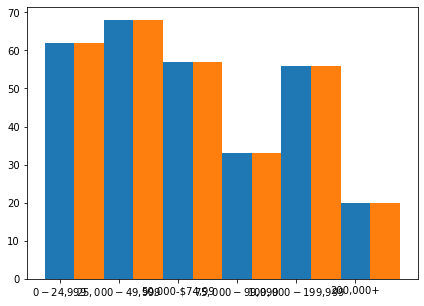

In [59]:
fig = plt.figure(figsize=(7,5))
titles = [62, 68, 57, 33, 56, 20]
hh_income = ["$0-$24,999","$25,000-$49,999", "50,000-$74,99", "$75,000-$99,999", "$100,000-$199,999", "200,000+"]
positions = [0, 1, 2, 3, 4, 5]
anxiety = [62, 68, 57, 33, 56, 20]
positions2 = [.5, 1.5, 2.5, 3.5, 4.5, 5.5]
plt.bar(positions, titles, width=0.5)
plt.bar(positions2, anxiety, width=0.5)
plt.xticks(positions, hh_income)


In [56]:
dropped_final_df = final_MH_completion_hh_income_df.drop(
    labels=["0−9,999", "10,000−24,999","100,000−124,999","125,000-149,999","150,000-174,999"]
"axis=0"
inplace=False)
dropped_final_df

SyntaxError: invalid syntax (<ipython-input-56-3e5250e18901>, line 3)

In [ ]:
redone_unemployment_MH_df = unemployment_MH_df[["I am currently employed at least part-time",
                                                "Lack of concentration",
                                                "Anxiety",
                                                "Depression",
                                                "Obsessive thinking",
                                                "Panic attacks",
                                                "Mood swings",
                                                "Compulsive behavior",
                                                "Tiredness"]]
redone_unemployment_MH_df

In [ ]:
redone_unemployment_MH_df["I am currently employed at least part-time"].value_counts()

In [ ]:
observed_employment = pd.Series([227, 107], index=["Employed", "Unemployed"])

observed_employment_df = pd.DataFrame([observed_employment]).T
observed_employment_df

In [ ]:
employment_vs_anxiety_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["I am currently employed at least part-time"])["Anxiety"].mean())
employment_vs_anxiety_groupby

In [ ]:
observed_employment_df.columns = ["Employment Status"]
observed_employment_df

In [ ]:
employment_vs_anxiety_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["I am currently employed at least part-time"])["Anxiety"].mean())
employment_vs_anxiety_groupby

In [ ]:
employment_vs_obs_thinking_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["I am currently employed at least part-time"])["Obsessive thinking"].mean())
employment_vs_obs_thinking_groupby

In [ ]:
employment_vs_depression_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["I am currently employed at least part-time"])["Depression"].mean())
employment_vs_depression_groupby

In [ ]:
employment_vs_lack_of_concentration_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["I am currently employed at least part-time"])["Lack of concentration"].mean())
employment_vs_lack_of_concentration_groupby

In [ ]:
employment_vs_moodswings_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["I am currently employed at least part-time"])["Mood swings"].mean())
employment_vs_moodswings_groupby

In [ ]:
employment_vs_tiredness_groupby = pd.DataFrame(redone_unemployment_MH_df.groupby(["I am currently employed at least part-time"])["Tiredness"].mean())
employment_vs_tiredness_groupby

In [ ]:
merged_employment_df_2 = pd.concat([employment_vs_anxiety_groupby, employment_vs_obs_thinking_groupby], axis=1)
merged_employment_df_2

In [ ]:
merged_employment_df_3 = pd.concat([merged_employment_df_2, employment_vs_depression_groupby], axis=1)
merged_employment_df_3

In [ ]:
merged_employment_df_4 = pd.concat([merged_employment_df_3, employment_vs_lack_of_concentration_groupby], axis=1)
merged_employment_df_4

In [ ]:
merged_employment_df_5 = pd.concat([merged_employment_df_4, employment_vs_moodswings_groupby], axis=1)
merged_employment_df_5

In [ ]:
final_employment_MH_completion_df = pd.concat([merged_employment_df_5, employment_vs_tiredness_groupby], axis=1)
final_employment_MH_completion_df